## CA 1 Data Visualization and Communication

Lecturer(s):
Submission Date:
Student Name:
Student Email: 
Student Number:

### Introduction

You are required to use the dataset contained within the file “Fotune500.csv” and then perform the following analysis:
1)You are required to explain what you plan on doing with the data. E.g., Why did you choose the specific visualizations? Why did you choose specific observations for a visualization, how did you Engineer your Data? etc This must be detailed in the Mark-up of the Jupyter Notebook and include the rationale for your choice.
2)Generate a plot that details the 5 top Companies by Revenue for each Decade. E.g., Top 5 for 1950-1959, 1960-1969, etc. This must be a single plot either static or interactive.
3)Plot a graph depicting the distribution of the “Revenue” in the top 20 Companies in 1971.
4)Find out and visualize which Top 10 Company’s profit increased the most between 1990 and 1999 This Must be a Single plot either static or interactive.
5)Observe and plot the average revenue by decade This Must be a Single plot either static or interactive. 


### Task 1

After importing the dataset, here is a step by step on how I plan to handle the data set:

First step is to decide which data frame and data visualization library should be used, we will be using pandas to understand the data, what are the types and to get an idea of what I will be working on, as is the most practical and the one I know the better, and seaborn as the data visualization library because I recently learnt it is an efficienty tool to work with, offers high quality interface in an easier way to work with, does not require too much lines of codes, it is build using the matplot so we can use the high level that seaborn has with low and basic customization level visualization that matplot has and is easy to integrate and work with using pandas data frame. Second step will be using to pandas to make an analyse of the data, its types, do some manipulation to learn more informations of all the data inside the file, such as which sector grew more along the years or decades and which sector was the strongest during the years.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("C:/Users/henri/Downloads/fortune500.csv")
data

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


In [5]:
data['Decade'] = (data['Year'] // 10) * 10

In [6]:
top_companies_by_decade = pd.DataFrame()

In [34]:
for decade in range(1950, 2001, 10):
    decade_data = data[data['Decade'] == decade]
    top_20_decade = decade_data.nlargest(5, 'Revenue (in millions)')
    top_companies_by_decade = pd.concat([top_companies_by_decade, top_20_decade])

In [22]:
top_companies_by_decade.reset_index(drop=True, inplace=True)

In [35]:
top_companies_by_decade

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Decade
0,1956,1,General Motors,12443.3,1189.5,1950
1,1958,1,General Motors,10989.8,843.6,1950
2,1957,1,General Motors,10796.4,847.4,1950
3,1955,1,General Motors,9823.5,806,1950
4,1959,1,General Motors,9522.0,633.6,1950
...,...,...,...,...,...,...
25000,2005,1,Wal-Mart Stores,288189.0,10267,2000
25001,2005,2,Exxon Mobil,270772.0,25330,2000
24500,2004,1,Wal-Mart Stores,258681.0,9054,2000
24000,2003,1,Wal-Mart Stores,246525.0,8039,2000


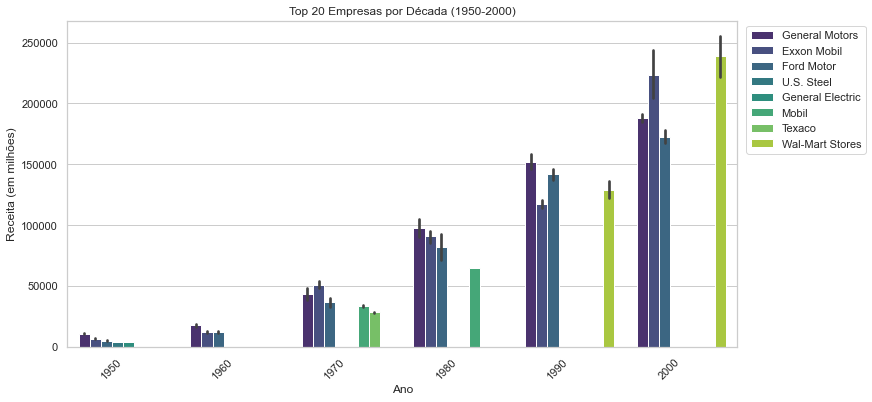

In [36]:
plt.figure(figsize=(12, 6))

sns.set(style="whitegrid")
sns.barplot(x='Decade', y='Revenue (in millions)', hue='Company', data=top_companies_by_decade, palette='viridis')
plt.title('Top 20 Empresas por Década (1950-2000)')
plt.xlabel('Ano')
plt.ylabel('Receita (em milhões)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()